In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [127]:
df=pd.DataFrame({'x':[2,3,3,4,5,6,6.2,6.1,7,6.9],
                 'y':[4,4.2,8,11,10,8,11.1,15,18,20]})
X=df[['x']]
Y=df['y']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=2)
ytest

4    10.0
1     4.2
5     8.0
Name: y, dtype: float64

In [118]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
ypred

array([ 5.76821433, 15.74472938, 10.75647186])

In [119]:
ytest

2     8.0
8    18.0
4    10.0
Name: y, dtype: float64

In [120]:
np.sum((ytest-ypred)**2)/3

3.5464541623955825

In [0]:
from sklearn.utils import resample
samp = [0,1,2,3,4,5,6,7,8,9]   # original data with 10 data points
# configure bootstrap
n_instances = 5            
n_size = 10
train = resample(samp, n_samples=n_size)  # Sampling with replacement 
df1=df.iloc[train]
train = resample(samp, n_samples=n_size)  # Sampling with replacement 
df2=df.iloc[train]
train = resample(samp, n_samples=n_size)  # Sampling with replacement 
df3=df.iloc[train]
train = resample(samp, n_samples=n_size)  # Sampling with replacement 
df4=df.iloc[train]
train = resample(samp, n_samples=n_size)  # Sampling with replacement 
df5=df.iloc[train]

In [0]:
m1=LinearRegression()
m2=LinearRegression()
m3=LinearRegression()
m4=LinearRegression()
m5=LinearRegression()

In [101]:
m1.fit(df1[['x']],df1['y'])
m2.fit(df2[['x']],df2['y'])
m3.fit(df3[['x']],df3['y'])
m4.fit(df4[['x']],df4['y'])
m5.fit(df5[['x']],df5['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
m1_pred=m1.predict(xtest)
m2_pred=m2.predict(xtest)
m3_pred=m3.predict(xtest)
m4_pred=m4.predict(xtest)
m5_pred=m5.predict(xtest)
m2_pred

array([10.29346703,  4.64016978, 13.12011565])

In [129]:
(m1_pred[0]+m2_pred[0]+m3_pred[0]+m4_pred[0]+m5_pred[0])/5

11.248516575028148

In [130]:
(m1_pred[1]+m2_pred[1]+m3_pred[1]+m4_pred[1]+m5_pred[1])/5

5.98391618554462

In [131]:
(m1_pred[2]+m2_pred[2]+m3_pred[2]+m4_pred[2]+m5_pred[2])/5

13.880816769769911

In [132]:
(np.sum((5.98-4.0)**2+(11.4-11)**2+(13.88-10)**2))/3

6.378266666666669

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("/content/drive/My Drive/Ensemble Techniques Mahesh Anand/prima-indians-diabetes.data",names=colnames)

In [0]:
X =  prima_df.drop("outcome", axis=1)
y =  prima_df.pop("outcome")

In [0]:
Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown tree (high bias error and var error)

In [0]:
Dt_model2=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)

In [0]:
#Bootstrapped sampled multiple decision tree(with the hope of controlling bias error)
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0 )

In [0]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('RandomForest', Rf_model))


DecisionTree: 0.562904 (0.004411)
RandomForest: 0.615826 (0.001247)


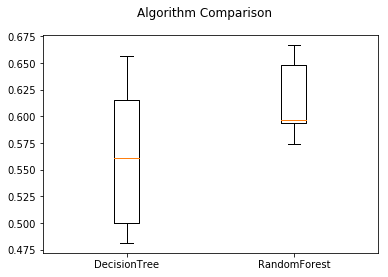

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
results

[array([0.5       , 0.65625   , 0.56140351, 0.61538462, 0.48148148]),
 array([0.64814815, 0.59375   , 0.59649123, 0.66666667, 0.57407407])]